# Exploratory Data Anylysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [13]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


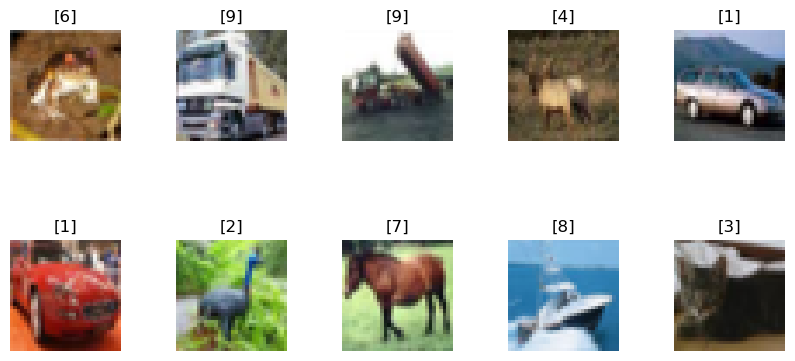

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(X_train[i])
    axes[i].set_title(y_train[i])
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

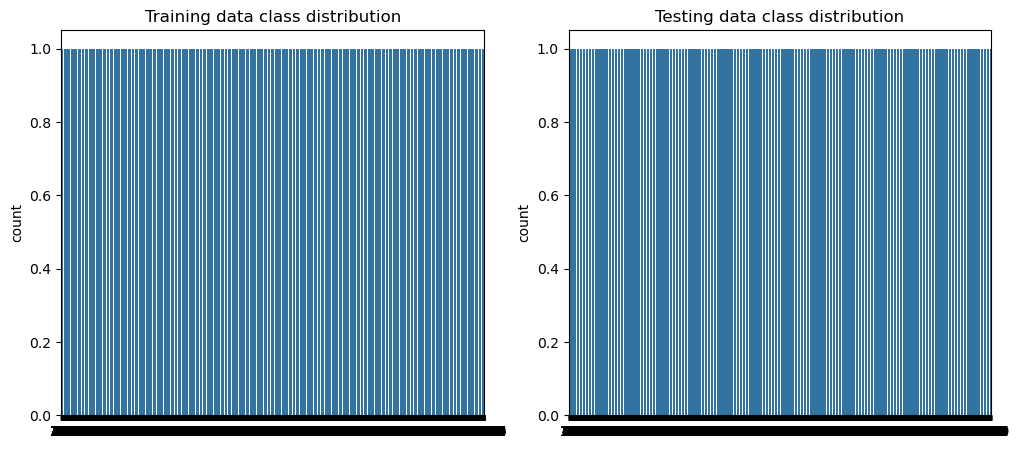

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(y_train.flatten(), ax=axes[0])
axes[0].set_title("Training data class distribution")
sns.countplot(y_test.flatten(), ax=axes[1])
axes[1].set_title("Testing data class distribution")
plt.show()

# Applying CNN as the base Model and AlexNet, RezNet18, MobileNet looking for better performance with and without HP tuning

# 1. Installing and importing the required libraries along with the CIFAR10 dataset

In [5]:
pip install numpy matplotlib tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# 2: Loading the Data

In [3]:
# Loading the Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 3: Normalize pixel values to be between 0 and 1

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 4: Convert Labels to One-Hot Encoding

In [9]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# 5. Building the base CNN model

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 6. Compiling the Model

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. Fitting the model

In [14]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8986 - loss: 0.2892 - val_accuracy: 0.6997 - val_loss: 1.1816
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9071 - loss: 0.2683 - val_accuracy: 0.6947 - val_loss: 1.2731
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9128 - loss: 0.2520 - val_accuracy: 0.6964 - val_loss: 1.2936
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9149 - loss: 0.2416 - val_accuracy: 0.6942 - val_loss: 1.2693
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9212 - loss: 0.2314 - val_accuracy: 0.6946 - val_loss: 1.3258
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9192 - loss: 0.2240 - val_accuracy: 0.6873 - val_loss: 1.4331
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9305 - loss: 0.1972 - val_accuracy: 0.6988 - val_loss: 1.4141
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9394 - loss: 0.1792 - val_accu

# 8. Evaluating the Model

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6667 - loss: 3.3384
Test accuracy: 0.6647999882698059


# 9. Visualize the training History

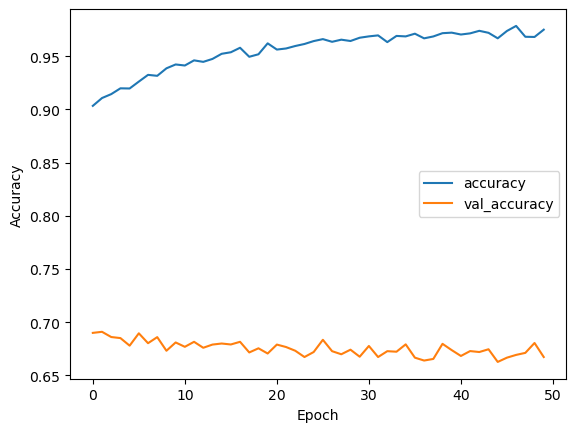

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


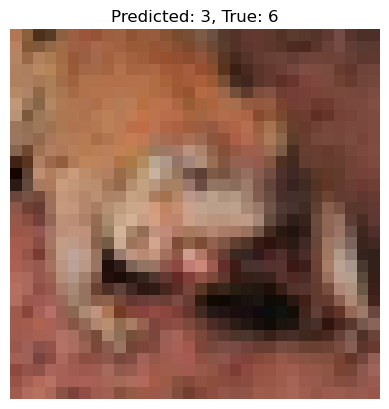

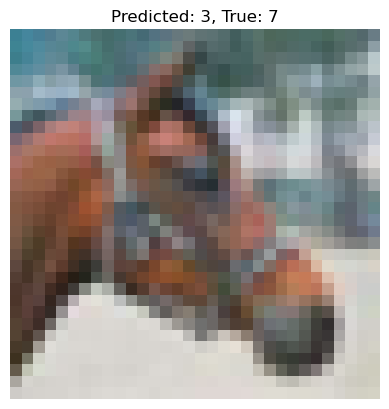

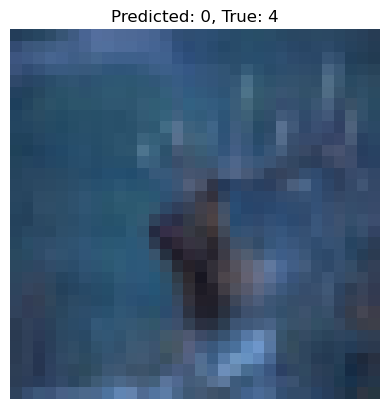

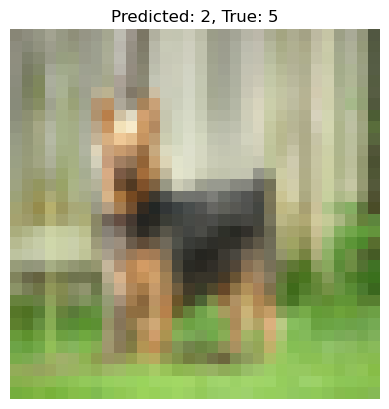

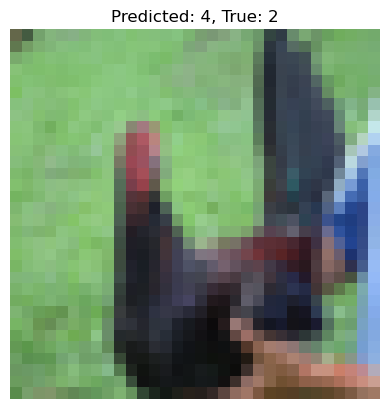

In [23]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

misclassified = np.where(predicted_classes != true_classes)[0]

# Plot misclassified images
for i in range(5):
    plt.imshow(x_test[misclassified[i]])
    plt.title(f'Predicted: {predicted_classes[misclassified[i]]}, True: {true_classes[misclassified[i]]}')
    plt.axis('off')
    plt.show()


# Exploring other Convolutional Neural Networks

# AlexNet

In [19]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the Dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert to One-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [20]:
# Define the Model:

def create_alexnet(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer for regularization
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer for regularization
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

model = create_alexnet()

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Fitting the model
batch_size = 64  # or another value based on your experiments
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 369s 588ms/step - accuracy: 0.2567 - loss: 1.9692 - val_accuracy: 0.5324 - val_loss: 1.2920
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 362s 580ms/step - accuracy: 0.5352 - loss: 1.2783 - val_accuracy: 0.5975 - val_loss: 1.1419
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 378s 605ms/step - accuracy: 0.6335 - loss: 1.0394 - val_accuracy: 0.6517 - val_loss: 0.9698
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 356s 570ms/step - accuracy: 0.6872 - loss: 0.8941 - val_accuracy: 0.6968 - val_loss: 0.8689
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 355s 568ms/step - accuracy: 0.7266 - loss: 0.7818 - val_accuracy: 0.7186 - val_loss: 0.8245
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 354s 566ms/step - accuracy: 0.7579 - loss: 0.7049 - val_accuracy: 0.7300 - val_loss: 0.7954
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 353s 565ms/step - accuracy: 0.7791 - loss: 0.6294 - val_accuracy: 0.7131 - val_loss: 0.8562
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 353s 565ms/step - accuracy: 0.7990 -

In [22]:
# Evaluate Test Data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.7283 - loss: 0.9086
Test accuracy: 0.7300000190734863


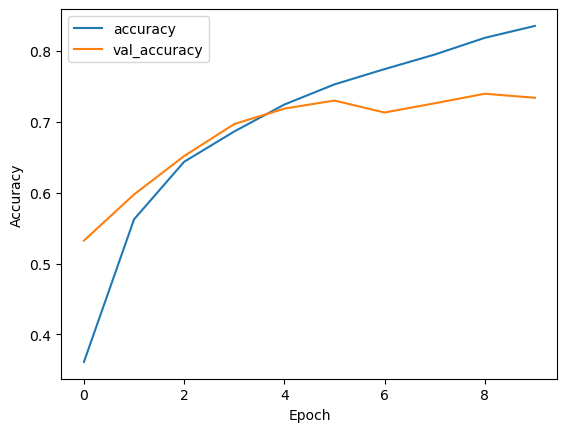

In [23]:
#Visualize Training History:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step


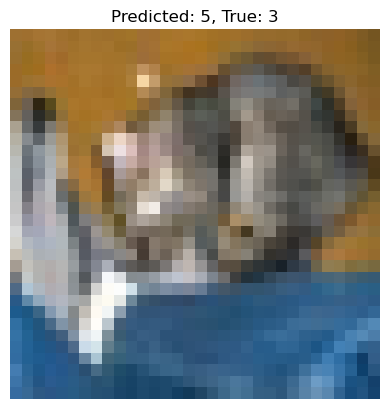

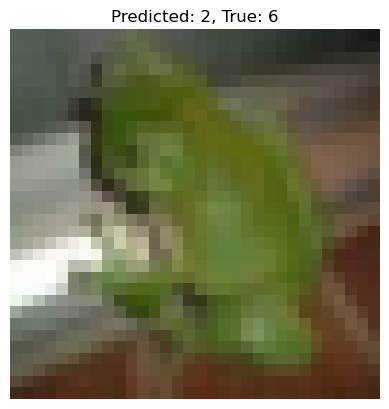

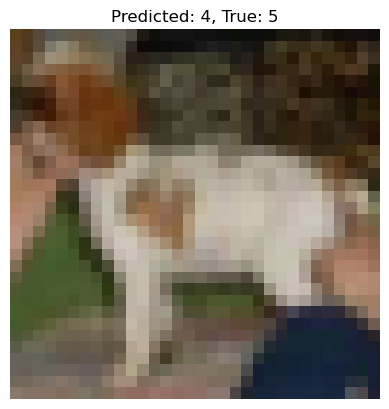

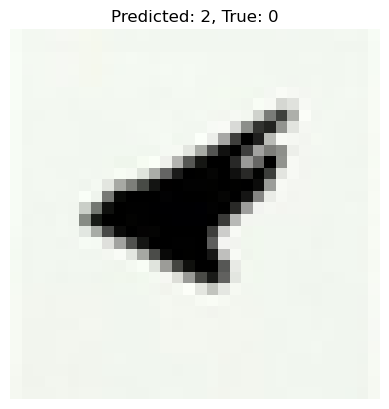

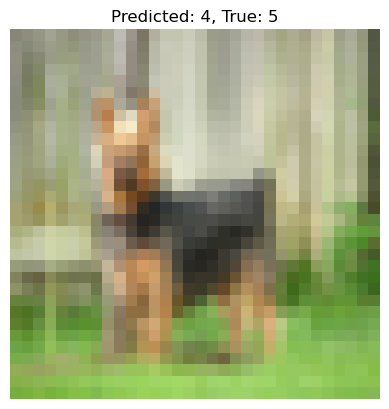

In [24]:
#Visualize Misclassified Images:

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

misclassified = np.where(predicted_classes != true_classes)[0]

# Plot misclassified images
for i in range(5):
    plt.imshow(x_test[misclassified[i]])
    plt.title(f'Predicted: {predicted_classes[misclassified[i]]}, True: {true_classes[misclassified[i]]}')
    plt.axis('off')
    plt.show()

# AlexNet Hyperparameter Tuning

In [5]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [10]:
from keras_tuner import Hyperband
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, models, layers
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
import keras

# Loading the dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the Dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert to One-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

# Define Learning Rate Reduction Callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

# Define the Model Function for Hyperparameter Tuning
def create_alexnet_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    
    # Tune the number of units in Dense layers and dropout rate
    model.add(layers.Dense(units=hp.Int('units_dense1', min_value=1024, max_value=4096, step=1024), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout_rate1', min_value=0.3, max_value=0.7, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units_dense2', min_value=1024, max_value=4096, step=1024), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout_rate2', min_value=0.3, max_value=0.7, step=0.1)))
    model.add(layers.Dense(10, activation='softmax'))
    
    # Compile the model with a tunable learning rate
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the Tuner
tuner = Hyperband(
    create_alexnet_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='tuner_dir',
    project_name='alexnet_tuning'
)

# Start the Search
tuner.search(datagen.flow(x_train, y_train, batch_size=64),
             epochs=50,
             validation_data=(x_test, y_test),
             callbacks=[reduce_lr])

# Retrieve the Best Model after Hyperparameter Tuning
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:", best_hp.values)


Trial 30 Complete [01h 13m 53s]
val_accuracy: 0.8054999709129333

Best val_accuracy So Far: 0.8258000016212463
Total elapsed time: 12h 12m 13s
Best Hyperparameters: {'units_dense1': 4096, 'dropout_rate1': 0.5, 'units_dense2': 2048, 'dropout_rate2': 0.6000000000000001, 'learning_rate': 0.00023260914877975476, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}


# ResNet18

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 553s 870ms/step - accuracy: 0.4065 - loss: 1.6691 - val_accuracy: 0.4336 - val_loss: 1.8018
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 547s 875ms/step - accuracy: 0.6861 - loss: 0.8898 - val_accuracy: 0.6793 - val_loss: 0.9258
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 562s 900ms/step - accuracy: 0.7792 - loss: 0.6352 - val_accuracy: 0.6422 - val_loss: 1.0757
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 522s 834ms/step - accuracy: 0.8271 - loss: 0.4966 - val_accuracy: 0.6158 - val_loss: 1.4103
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 515s 824ms/step - accuracy: 0.8636 - loss: 0.3923 - val_accuracy: 0.7432 - val_loss: 0.7694
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 514s 822ms/step - accuracy: 0.8994 - loss: 0.2912 - val_accuracy: 0.6841 - val_loss: 1.0967
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1778s 3s/step - accuracy: 0.9222 - loss: 0.2263 - val_accuracy: 0.7513 - val_loss: 0.8240
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 516s 825ms/step - accuracy: 0.9484 - l

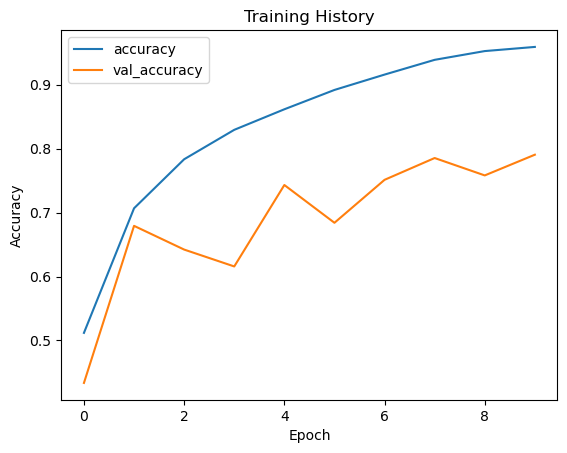

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step


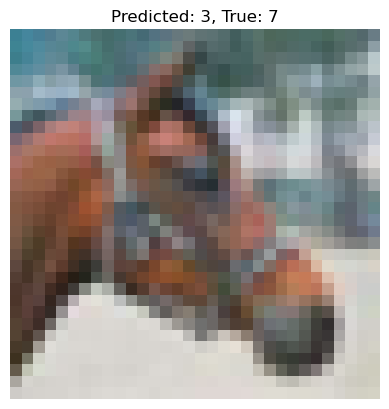

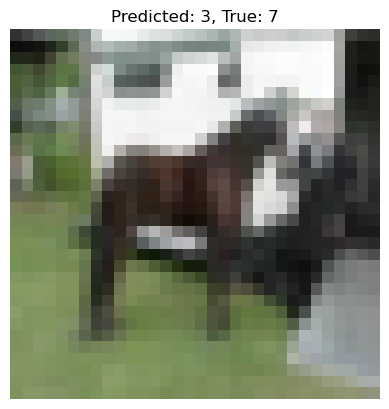

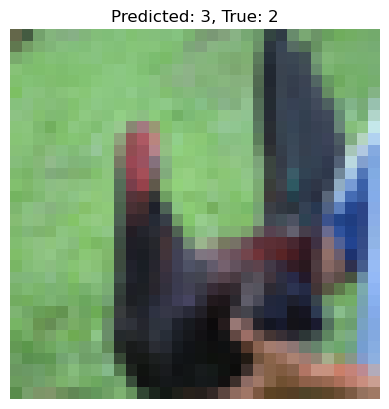

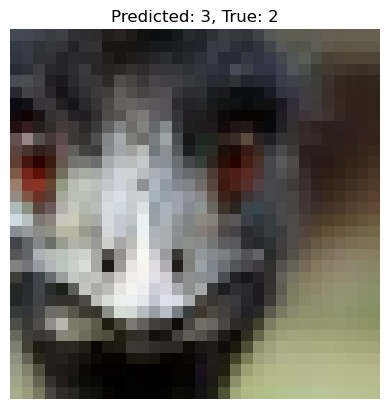

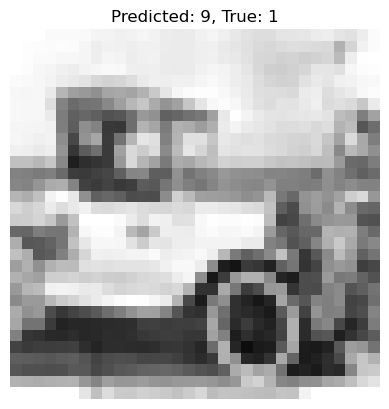

In [25]:
# Load and Preprocess CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize training data
x_test = x_test.astype('float32') / 255.0  # Normalize testing data
y_train = keras.utils.to_categorical(y_train, 10)  # One-hot encode labels
y_test = keras.utils.to_categorical(y_test, 10)  # One-hot encode labels

# Define Residual Block
def residual_block(x, filters):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.add([x, shortcut])  # Add shortcut connection
    x = layers.ReLU()(x)
    return x

# Define ResNet-18 Model
def create_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # 2 Residual Blocks with 64 filters
    for _ in range(2):
        x = residual_block(x, 64)

    # 2 Residual Blocks with 128 filters
    x = layers.Conv2D(128, (2, 2), strides=(2, 2), padding='same')(x)
    for _ in range(2):
        x = residual_block(x, 128)

    # 2 Residual Blocks with 256 filters
    x = layers.Conv2D(256, (2, 2), strides=(2, 2), padding='same')(x)
    for _ in range(2):
        x = residual_block(x, 256)

    # Global Average Pooling and Fully Connected Layer
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Create and Compile the Model
model = create_resnet()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
batch_size = 64  # Adjust based on memory constraints
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Visualize Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()

# Visualize Misclassified Images
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
misclassified = np.where(predicted_classes != true_classes)[0]

# Plot misclassified images
for i in range(5):
    plt.imshow(x_test[misclassified[i]])
    plt.title(f'Predicted: {predicted_classes[misclassified[i]]}, True: {true_classes[misclassified[i]]}')
    plt.axis('off')
    plt.show()

# ResNet18 Hyper parameter tuning

Epoch 1/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 692s 874ms/step - accuracy: 0.3937 - loss: 1.6772 - val_accuracy: 0.3900 - val_loss: 2.2261 - learning_rate: 0.0010
Epoch 2/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.7188 - loss: 0.9834 - val_accuracy: 0.3979 - val_loss: 2.1501 - learning_rate: 0.0010
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 684s 875ms/step - accuracy: 0.6534 - loss: 0.9772 - val_accuracy: 0.5398 - val_loss: 1.7435 - learning_rate: 0.0010
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.7344 - loss: 0.7287 - val_accuracy: 0.5383 - val_loss: 1.7475 - learning_rate: 0.0010
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 683s 874ms/step - accuracy: 0.7319 - loss: 0.7687 - val_accuracy: 0.7112 - val_loss: 0.8603 - learning_rate: 0.0010
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8750 - loss: 0.4503 - val_accuracy: 0.7027 - val_loss: 0.8899 - learning_rate: 0.0010
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 670s 858ms/step - accuracy: 0.

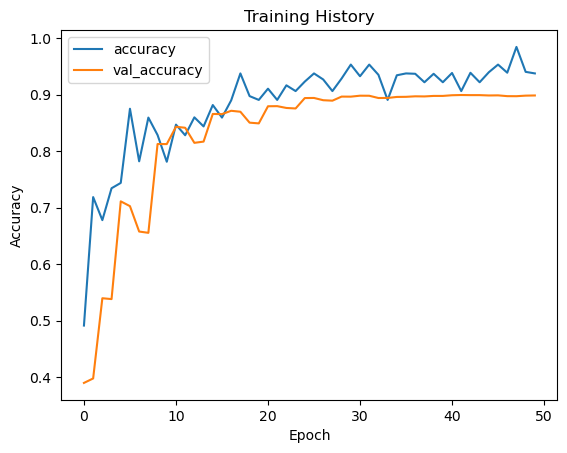

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 116ms/step


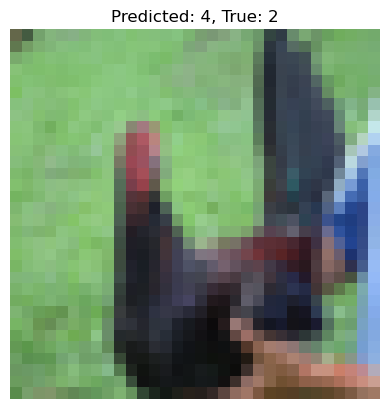

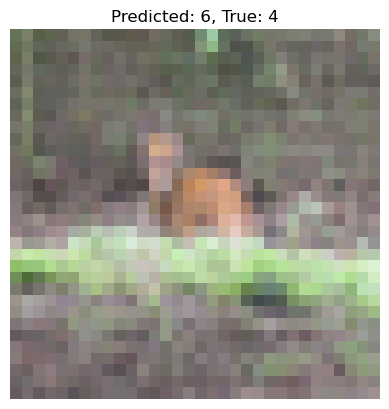

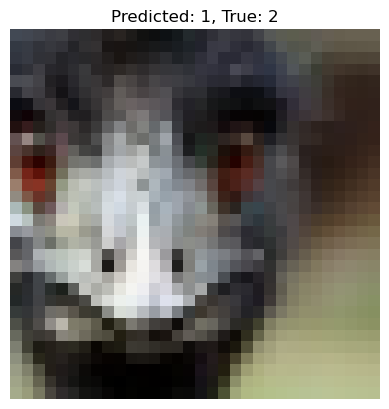

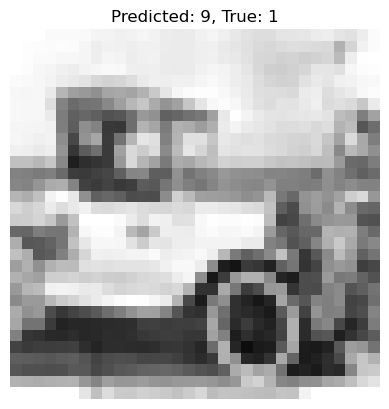

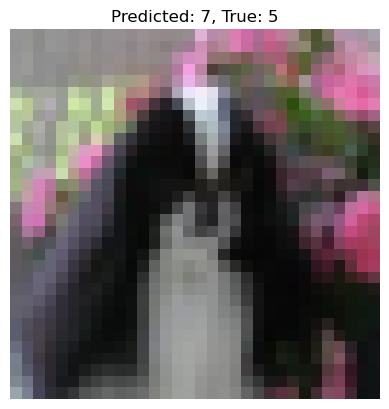

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load and Preprocess CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize training data
x_test = x_test.astype('float32') / 255.0  # Normalize testing data
y_train = keras.utils.to_categorical(y_train, 10)  # One-hot encode labels
y_test = keras.utils.to_categorical(y_test, 10)  # One-hot encode labels

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # Randomly rotate images in the range (degrees)
    width_shift_range=0.1,  # Randomly shift images horizontally
    height_shift_range=0.1, # Randomly shift images vertically
    horizontal_flip=True,    # Randomly flip images
    zoom_range=0.1          # Randomly zoom in/out
)
datagen.fit(x_train)

# Define Residual Block
def residual_block(x, filters):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.add([x, shortcut])  # Add shortcut connection
    x = layers.ReLU()(x)
    return x

# Define ResNet-18 Model
def create_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # 2 Residual Blocks with 64 filters
    for _ in range(2):
        x = residual_block(x, 64)

    # 2 Residual Blocks with 128 filters
    x = layers.Conv2D(128, (2, 2), strides=(2, 2), padding='same')(x)
    for _ in range(2):
        x = residual_block(x, 128)

    # 2 Residual Blocks with 256 filters
    x = layers.Conv2D(256, (2, 2), strides=(2, 2), padding='same')(x)
    for _ in range(2):
        x = residual_block(x, 256)

    # Global Average Pooling and Fully Connected Layer
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Create and Compile the Model
model = create_resnet()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

# Learning Rate Reduction on Plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

# Train the Model with Data Augmentation
batch_size = 64  # Batch size
epochs = 50      # Increase epochs for better convergence

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=len(x_train) // batch_size,
                    callbacks=[reduce_lr])

# Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Visualize Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()

# Visualize Misclassified Images
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
misclassified = np.where(predicted_classes != true_classes)[0]

# Plot misclassified images
for i in range(5):
    plt.imshow(x_test[misclassified[i]])
    plt.title(f'Predicted: {predicted_classes[misclassified[i]]}, True: {true_classes[misclassified[i]]}')
    plt.axis('off')
    plt.show()

# MobileNet

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 209ms/step - accuracy: 0.2097 - loss: 2.2249 - val_accuracy: 0.1014 - val_loss: 2.3099
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 222ms/step - accuracy: 0.3993 - loss: 1.6415 - val_accuracy: 0.0952 - val_loss: 2.3330
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 207ms/step - accuracy: 0.4649 - loss: 1.4876 - val_accuracy: 0.1016 - val_loss: 2.3379
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 204ms/step - accuracy: 0.4839 - loss: 1.4565 - val_accuracy: 0.1016 - val_loss: 2.3706
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 204ms/step - accuracy: 0.4975 - loss: 1.4153 - val_accuracy: 0.0952 - val_loss: 2.3907
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 203ms/step - accuracy: 0.5404 - loss: 1.2821 - val_accuracy: 0.1016 - val_loss: 2.4091
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 204ms/step - accuracy: 0.5694 - loss: 1.2176 - val_accuracy: 0.1652 - val_loss: 2.1278
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 203ms/step - accuracy: 0.5058 -

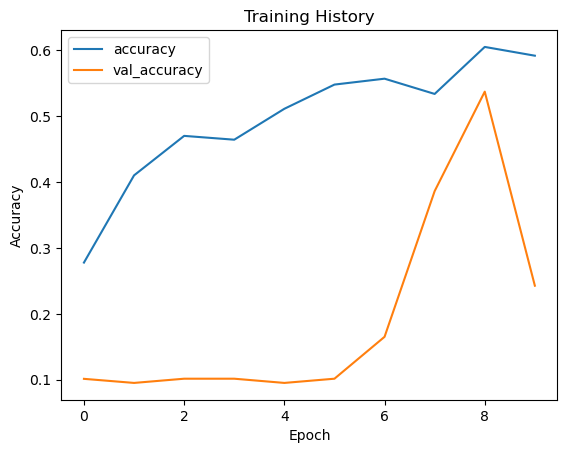

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step


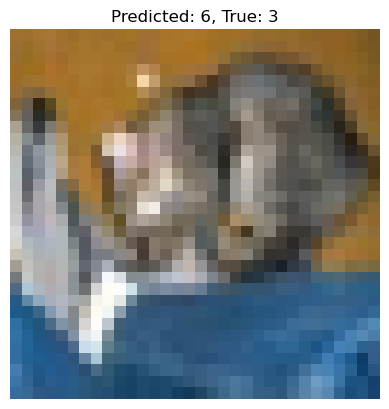

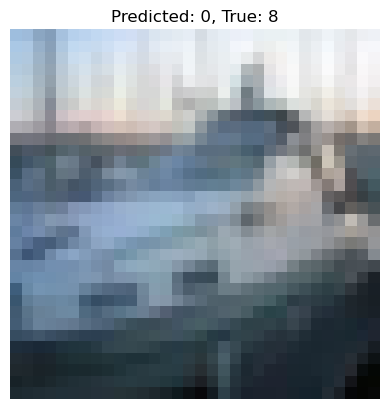

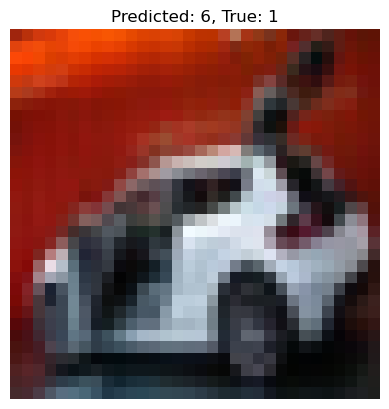

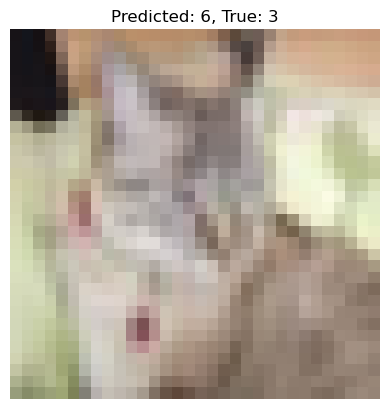

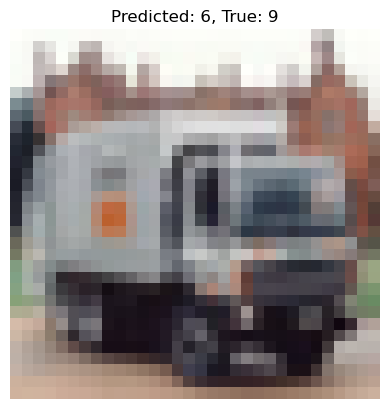

In [26]:
# Load and Preprocess CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize training data
x_test = x_test.astype('float32') / 255.0  # Normalize testing data
y_train = keras.utils.to_categorical(y_train, 10)  # One-hot encode labels
y_test = keras.utils.to_categorical(y_test, 10)  # One-hot encode labels

# Define MobileNet Model
def create_mobilenet(input_shape=(32, 32, 3), num_classes=10):
    base_model = keras.applications.MobileNetV2(input_shape=input_shape,
                                                 include_top=False,
                                                 weights=None,  # No pre-trained weights
                                                 alpha=1.0)  # Adjust width of the network
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)  # Global average pooling
    outputs = layers.Dense(num_classes, activation='softmax')(x)  # Final classification layer
    model = models.Model(inputs=base_model.input, outputs=outputs)
    return model

# Create and Compile the Model
model = create_mobilenet()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
batch_size = 64  # Adjust based on memory constraints
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Visualize Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()

# Visualize Misclassified Images
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
misclassified = np.where(predicted_classes != true_classes)[0]

# Plot misclassified images
for i in range(5):
    plt.imshow(x_test[misclassified[i]])
    plt.title(f'Predicted: {predicted_classes[misclassified[i]]}, True: {true_classes[misclassified[i]]}')
    plt.axis('off')
    plt.show()

# Mobile net - Hyper parameter tuning

Epoch 1/50


C:\Users\akifk\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 206s 231ms/step - accuracy: 0.2123 - loss: 2.3553 - val_accuracy: 0.1000 - val_loss: 2.3299
Epoch 2/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.3125 - loss: 1.9392 - val_accuracy: 0.1000 - val_loss: 2.3301
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 172s 220ms/step - accuracy: 0.3373 - loss: 1.8417 - val_accuracy: 0.1000 - val_loss: 2.3689
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3594 - loss: 1.7383 - val_accuracy: 0.1000 - val_loss: 2.3675
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 172s 221ms/step - accuracy: 0.3522 - loss: 1.8381 - val_accuracy: 0.1000 - val_loss: 2.4012
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4219 - loss: 1.6412 - val_accuracy: 0.1000 - val_loss: 2.4001
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 173s 221ms/step - accuracy: 0.3815 - loss: 1.7531 - val_accuracy: 0.1000 - val_loss: 2.3481
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4375 - loss: 1.4114 - val_accura

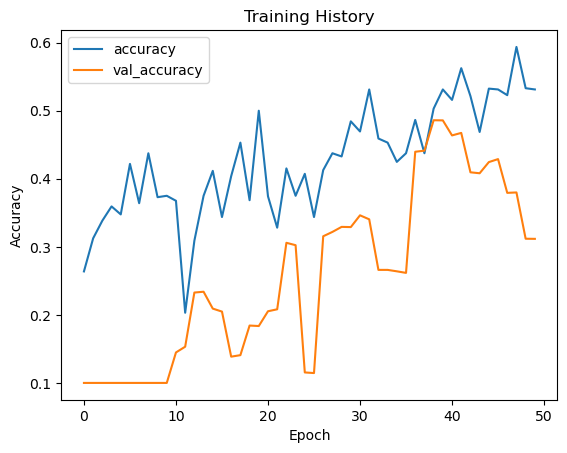

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step


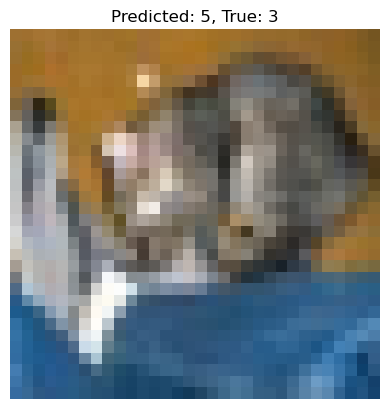

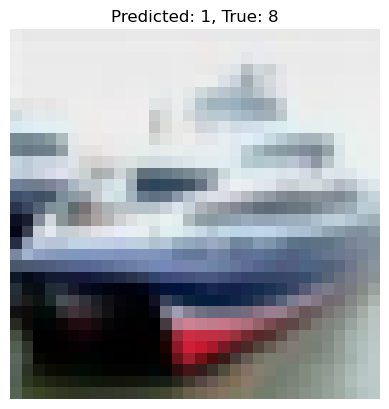

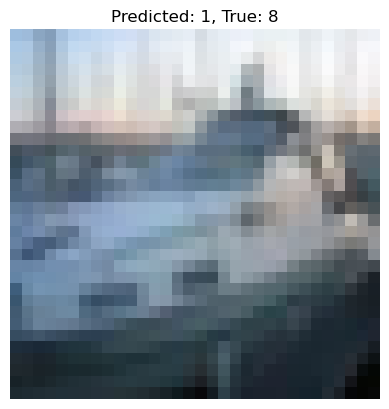

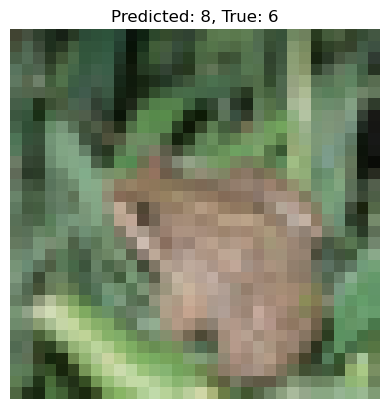

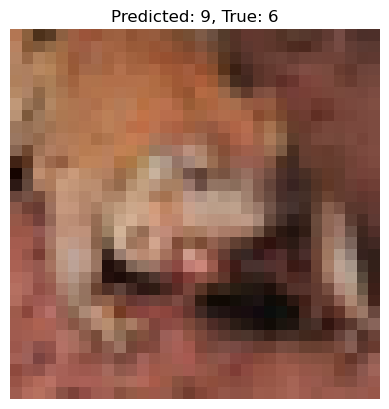

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and Preprocess CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize training data
x_test = x_test.astype('float32') / 255.0  # Normalize testing data
y_train = keras.utils.to_categorical(y_train, 10)  # One-hot encode labels
y_test = keras.utils.to_categorical(y_test, 10)  # One-hot encode labels

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # Randomly rotate images in the range (degrees)
    width_shift_range=0.1,  # Randomly shift images horizontally
    height_shift_range=0.1, # Randomly shift images vertically
    horizontal_flip=True,    # Randomly flip images
    zoom_range=0.1          # Randomly zoom in/out
)
datagen.fit(x_train)

# Define MobileNet Model with Dropout for Regularization
def create_mobilenet(input_shape=(32, 32, 3), num_classes=10):
    base_model = keras.applications.MobileNetV2(input_shape=input_shape,
                                                 include_top=False,
                                                 weights=None,  # No pre-trained weights
                                                 alpha=1.0)  # Adjust width of the network
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)  # Global average pooling
    x = layers.Dropout(0.5)(x)  # Add Dropout layer for regularization
    outputs = layers.Dense(num_classes, activation='softmax')(x)  # Final classification layer
    model = models.Model(inputs=base_model.input, outputs=outputs)
    return model

# Create and Compile the Model
model = create_mobilenet()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Adjust learning rate
              loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model with Data Augmentation
batch_size = 64  # Batch size
epochs = 50      # Increase epochs for better convergence
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=len(x_train) // batch_size)

# Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Visualize Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()

# Visualize Misclassified Images
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
misclassified = np.where(predicted_classes != true_classes)[0]

# Plot misclassified images
for i in range(5):
    plt.imshow(x_test[misclassified[i]])
    plt.title(f'Predicted: {predicted_classes[misclassified[i]]}, True: {true_classes[misclassified[i]]}')
    plt.axis('off')
    plt.show()